<a href="https://colab.research.google.com/github/wizkid31/Skin-Cancer-Prediction/blob/main/Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
address = 'https://raw.githubusercontent.com/wizkid31/Skin-Cancer-Prediction/main/HAM10000_metadata.csv'
df = pd.read_csv(address)

In [3]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [5]:
df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [6]:
df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [7]:
df['dx_type'].value_counts()

histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64

In [8]:
dx_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

df['diagnosis'] = df['dx'].map(dx_dict.get) 

In [9]:
df['diagnosis'].value_counts()

Melanocytic nevi                  6705
Melanoma                          1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: diagnosis, dtype: int64

In [10]:
df['sex'].value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

In [11]:
df['localization'].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

In [12]:
df['age'].value_counts()

45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: age, dtype: int64

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
import numpy as np

In [15]:
imputer = SimpleImputer(missing_values= np.nan,strategy='mean')  
Car_impute = imputer.fit(df[['age']])
df['age'] = Car_impute.transform(df[['age']]).ravel()

In [16]:
df.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
diagnosis       0
dtype: int64

In [17]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns

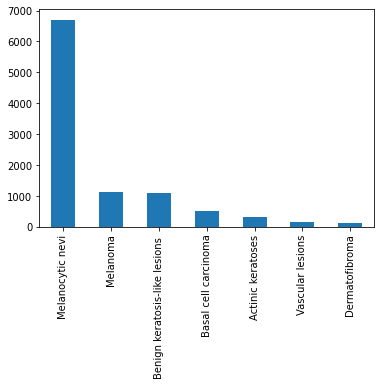

In [19]:
df['diagnosis'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


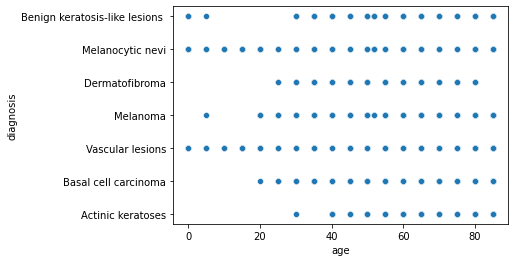

In [20]:
sns.scatterplot('age','diagnosis',data=df)

In [21]:
from sklearn import preprocessing

In [22]:
label_encoder = preprocessing.LabelEncoder()

In [23]:
df1 = df.copy()

In [24]:
lesion_id_cat = label_encoder.fit_transform(df1['lesion_id'])
lesion_id_cat = pd.DataFrame({'lesion_id_cat': lesion_id_cat})

In [25]:
image_id_cat = label_encoder.fit_transform(df1['image_id'])
image_id_cat = pd.DataFrame({'image_id_cat': image_id_cat})

In [26]:
dx_cat = label_encoder.fit_transform(df1['dx'])
dx_cat = pd.DataFrame({'dx_cat': dx_cat})

In [27]:
dx_type_cat = label_encoder.fit_transform(df1['dx_type'])
dx_type_cat = pd.DataFrame({'dx_type_cat': dx_type_cat})

In [28]:
sex_cat = label_encoder.fit_transform(df1['sex'])
sex_cat = pd.DataFrame({'sex_cat': sex_cat})

In [29]:
localization_cat = label_encoder.fit_transform(df1['localization'])
localization_cat = pd.DataFrame({'localization_cat': localization_cat})

In [30]:
diagnosis_cat = label_encoder.fit_transform(df1['diagnosis'])
diagnosis_cat = pd.DataFrame({'diagnosis_cat': diagnosis_cat})

In [31]:
df1.lesion_id = lesion_id_cat
df1.image_id = image_id_cat
df1.dx = dx_cat
df1.dx_type = dx_type_cat
df1.sex = sex_cat
df1.localization = localization_cat
df1.diagnosis = diagnosis_cat

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaled_features = df1.copy()

In [34]:
col_names = ['lesion_id', 'image_id' , 'dx', 'dx_type', 'age', 'sex', 'localization', 'diagnosis']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [35]:
scaled_features[col_names] = features
scaled_features

,lesion_id,image_id,dx,dx_type,age,sex,localization,diagnosis
0,-1.680017,-0.655118,-1.496108,0.835507,1.662953,0.882321,0.847871,-1.343453
1,-1.680017,-1.481453,-1.496108,0.835507,1.662953,0.882321,0.847871,-1.343453
2,-0.474447,-0.879948,-1.496108,0.835507,1.662953,0.882321,0.847871,-1.343453
3,-0.474447,-1.263195,-1.496108,0.835507,1.662953,0.882321,0.847871,-1.343453
4,-1.055837,0.802468,-1.496108,0.835507,1.367434,0.882321,-0.626664,-1.343453
...,...,...,...,...,...,...,...,...
10010,-0.412122,1.304356,-2.867221,0.835507,-0.701196,0.882321,-1.469256,-2.997989
10011,-0.412122,1.465542,-2.867221,0.835507,-0.701196,0.882321,-1.469256,-2.997989
10012,-0.412122,1.460699,-2.867221,0.835507,-0.701196,0.882321,-1.469256,-2.997989
10013,-1.623738,1.224801,-2.867221,0.835507,1.662953,0.882321,-0.416016,-2.997989


In [36]:
X = scaled_features.drop(columns=['diagnosis'],axis=1)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
y = df.dx

In [39]:
y = [1 if each == 'bkl' or each == 'nv' or each == 'df' else 0 for each in df.dx]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [41]:
from sklearn.svm import SVC

In [42]:
model_svc = SVC()

In [43]:
model_svc.fit(X_train, y_train)

SVC()

In [44]:
model_svc.score(X_train,y_train)

0.9811532700948578

In [45]:
model_svc.score(X_test,y_test)

0.9675486769845232

In [46]:
y_predict = model_svc.predict(X_test)

In [47]:
from sklearn.metrics import classification_report , confusion_matrix

In [48]:
import numpy as np

In [49]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,1567,25
is_healthy,40,371


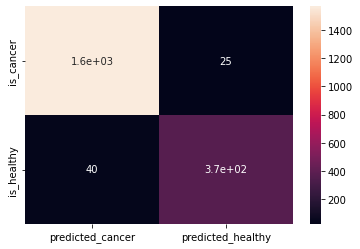

In [50]:
sns.heatmap(confusion, annot=True)

In [51]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       411
           1       0.98      0.98      0.98      1592

    accuracy                           0.97      2003
   macro avg       0.96      0.94      0.95      2003
weighted avg       0.97      0.97      0.97      2003



In [52]:
y = df1['diagnosis']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [54]:
model_svc.fit(X_train, y_train)

SVC()

In [55]:
model_svc.score(X_train,y_train)

0.9998751872191712

In [56]:
model_svc.score(X_test,y_test)

1.0

In [57]:
y_predict = model_svc.predict(X_test)

In [58]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       228
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00      1327
           5       1.00      1.00      1.00       222
           6       1.00      1.00      1.00        32

    accuracy                           1.00      2003
   macro avg       1.00      1.00      1.00      2003
weighted avg       1.00      1.00      1.00      2003



In [59]:
import itertools

In [60]:
def confusion_mat (cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

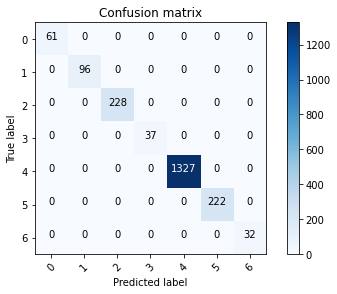

In [61]:
confusion_mat(confusion_matrix(y_test, y_predict), classes = range(7)) 